In [2]:
import sys
if not '..' in sys.path:
    sys.path.append('..')
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colormaps
from analysis import collection, analysis, emg
from analysis import plot as analysis_plot
import scipy as sp
import pandas as pd
from sklearn.mixture import BayesianGaussianMixture
from sklearn.base import clone
import seaborn as sns
import pickle
from scipy.stats import multivariate_normal
%matplotlib inline

    initialize gmm model

    for each trial:

    fit a GMM to the trial with N modes

    store this model

    update initalization to the current fit for the next trial

    plot model means over trials?

projection into 2d:

$$ x \propto N(\mu, \Sigma) $$
$$ y = Ax + b $$
$$ y \propto N(A\mu + b, A\Sigma A^T) $$

In [3]:
def log_emg_data(samples,mean_56=True):
    assert len(samples.shape) == 2
    assert samples.shape[0] > samples.shape[1]
    if mean_56:
        samples[:,56] = np.mean(samples[:,(56-8,56-16)],axis=1)
    return np.log(samples)

# fit calibration models

In [19]:
stacks = np.load(f"subject_filtered_calibration_stacks.npy")[2]
signal = analysis.remove_nan_rows(stacks.transpose(0,1,3,2).reshape(-1,64))
# signal[:,56] = np.mean([signal[:,56-8],signal[:,56-16]])
print(signal.shape)
mask = np.any(signal<=0,axis=1)
signal = signal[~mask]
print("negative values removed:", np.where(mask)[0].shape)
print(signal.shape)
# plt.figure(figsize=(20,20))
# for ch in range(64):
#     plt.plot(signal[:,ch],"k",alpha=0.2)
#     plt.plot(np.where(mask),signal[np.where(mask),ch],'ro')

(38615, 64)
negative values removed: (6,)
(38609, 64)


In [21]:
'''
weight_concentration_prior
    The higher concentration puts more mass in the center and 
    will lead to more components being active, while a lower 
    concentration parameter will lead to more mass at the edge 
    of the mixture weights simplex.
'''
# https://stats.stackexchange.com/questions/210103/choosing-prior-parameters-for-variational-mixture-of-gaussians
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture 


from pathlib import Path

OVERWRITE = False

NUM_COMPONENTS = 12
folderpath = Path("gmm_models_log_calibration")
if not folderpath.exists():
    Path.mkdir(folderpath)
file_prefix = "subject_"

calibration_stacks = np.load(f"subject_filtered_calibration_stacks.npy")

for subject_idx in range(46):

    filepath = Path(folderpath / (file_prefix + f"{subject_idx}.pkl"))
    if OVERWRITE == False:
        if filepath.exists():
            print(f"File {filepath} exists.")
        else:

            print(f"Fitting subject {subject_idx}.")
            stack = calibration_stacks[subject_idx]
            model = BayesianGaussianMixture(n_components=NUM_COMPONENTS,
                                            weight_concentration_prior_type='dirichlet_process',
                                            weight_concentration_prior=1.0E-8,
                                            max_iter=300,
                                            n_init=2,
                                            warm_start=True,
                                            random_state=0,
                                            )
            models = []                    
            signal = analysis.remove_nan_rows(stack.transpose(0,1,3,2).reshape(-1,64))
            mask = np.any(signal<=0,axis=1)
            signal = signal[~mask]
            print("negative values removed:", np.where(mask)[0].shape)                 
            log_signal = log_emg_data(signal, mean_56=False)
            model.fit(log_signal)
            models.append(model)
            model = clone(model)

            print(f"Saving {filepath}.")
            with open(filepath,"wb") as handle:
                pickle.dump(models, handle)


File gmm_models_log_calibration/subject_0.pkl exists.
File gmm_models_log_calibration/subject_1.pkl exists.
Fitting subject 2.
negative values removed: (6,)
Saving gmm_models_log_calibration/subject_2.pkl.
Fitting subject 3.
negative values removed: (0,)


/home/spencer/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Saving gmm_models_log_calibration/subject_3.pkl.
Fitting subject 4.
negative values removed: (5,)
Saving gmm_models_log_calibration/subject_4.pkl.
Fitting subject 5.
negative values removed: (0,)


/home/spencer/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Saving gmm_models_log_calibration/subject_5.pkl.
Fitting subject 6.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_6.pkl.
Fitting subject 7.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_7.pkl.
Fitting subject 8.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_8.pkl.
Fitting subject 9.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_9.pkl.
Fitting subject 10.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_10.pkl.
Fitting subject 11.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_11.pkl.
Fitting subject 12.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_12.pkl.
Fitting subject 13.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_13.pkl.
Fitting subject 14.
negative values removed: (0,)


/home/spencer/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Saving gmm_models_log_calibration/subject_14.pkl.
Fitting subject 15.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_15.pkl.
Fitting subject 16.
negative values removed: (7,)
Saving gmm_models_log_calibration/subject_16.pkl.
Fitting subject 17.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_17.pkl.
Fitting subject 18.
negative values removed: (3,)
Saving gmm_models_log_calibration/subject_18.pkl.
Fitting subject 19.
negative values removed: (7,)
Saving gmm_models_log_calibration/subject_19.pkl.
Fitting subject 20.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_20.pkl.
Fitting subject 21.
negative values removed: (0,)


/home/spencer/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Saving gmm_models_log_calibration/subject_21.pkl.
Fitting subject 22.
negative values removed: (3,)
Saving gmm_models_log_calibration/subject_22.pkl.
Fitting subject 23.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_23.pkl.
Fitting subject 24.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_24.pkl.
Fitting subject 25.
negative values removed: (6,)
Saving gmm_models_log_calibration/subject_25.pkl.
Fitting subject 26.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_26.pkl.
Fitting subject 27.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_27.pkl.
Fitting subject 28.
negative values removed: (5354,)
Saving gmm_models_log_calibration/subject_28.pkl.
Fitting subject 29.
negative values removed: (73,)
Saving gmm_models_log_calibration/subject_29.pkl.
Fitting subject 30.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_30.pkl.
Fitting subject 31.
negative values removed: (

/home/spencer/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Saving gmm_models_log_calibration/subject_41.pkl.
Fitting subject 42.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_42.pkl.
Fitting subject 43.
negative values removed: (0,)


/home/spencer/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


Saving gmm_models_log_calibration/subject_43.pkl.
Fitting subject 44.
negative values removed: (0,)
Saving gmm_models_log_calibration/subject_44.pkl.
Fitting subject 45.
negative values removed: (18,)
Saving gmm_models_log_calibration/subject_45.pkl.


# fit movement models

In [4]:
'''
weight_concentration_prior
    The higher concentration puts more mass in the center and 
    will lead to more components being active, while a lower 
    concentration parameter will lead to more mass at the edge 
    of the mixture weights simplex.
'''
# https://stats.stackexchange.com/questions/210103/choosing-prior-parameters-for-variational-mixture-of-gaussians
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture 


from pathlib import Path

OVERWRITE = False

NUM_COMPONENTS = 12
folderpath = Path("gmm_models_log_movement")
if not folderpath.exists():
    Path.mkdir(folderpath)
file_prefix = "subject_"

movement_stacks = np.load(f"subject_filtered_movement_stacks.npy")

for subject_idx in range(46):

    filepath = Path(folderpath / (file_prefix + f"{subject_idx}.pkl"))
    if OVERWRITE == False:
        if filepath.exists():
            print(f"File {filepath} exists.")
        else:

            print(f"Fitting subject {subject_idx}.")
            stack = movement_stacks[subject_idx]
            model = BayesianGaussianMixture(n_components=NUM_COMPONENTS,
                                            weight_concentration_prior_type='dirichlet_process',
                                            weight_concentration_prior=1.0E-8,
                                            max_iter=300,
                                            n_init=2,
                                            warm_start=True,
                                            random_state=0,
                                            )
            models = []                    
            signal = analysis.remove_nan_rows(stack.transpose(0,1,3,2).reshape(-1,64))
            mask = np.any(signal<=0,axis=1)
            signal = signal[~mask]
            print("negative values removed:", np.where(mask)[0].shape)                 
            log_signal = log_emg_data(signal, mean_56=False)
            model.fit(log_signal)
            models.append(model)
            model = clone(model)

            print(f"Saving {filepath}.")
            with open(filepath,"wb") as handle:
                pickle.dump(models, handle)


Fitting subject 0.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_0.pkl.
Fitting subject 1.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_1.pkl.
Fitting subject 2.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_2.pkl.
Fitting subject 3.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_3.pkl.
Fitting subject 4.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_4.pkl.
Fitting subject 5.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_5.pkl.
Fitting subject 6.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_6.pkl.
Fitting subject 7.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_7.pkl.
Fitting subject 8.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_8.pkl.
Fitting subject 9.
negative values removed: (0,)
Saving gmm_models_log_movement/subject_9.pkl.
Fitting subject 10.
negative values removed: (0,)


# fit trial models

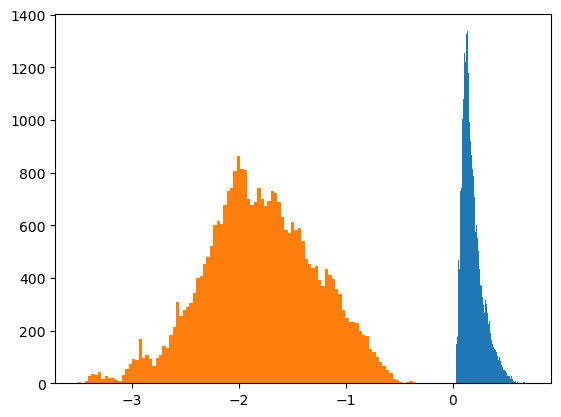

In [6]:
# quickly test the log function
X = np.load("filtered_stacks/filtered_stack_0.npy")
X = X.transpose(0,1,3,2).reshape(-1,64)[:5000]
_ = plt.hist(X.reshape(-1),100)
_ = plt.hist(log_emg_data(X).reshape(-1),100)

In [10]:
with open('olympics_subjects.pkl', 'rb') as handle:
    subjects = pickle.load(handle)
len(subjects)

46

(203915, 64)
(203324, 64)


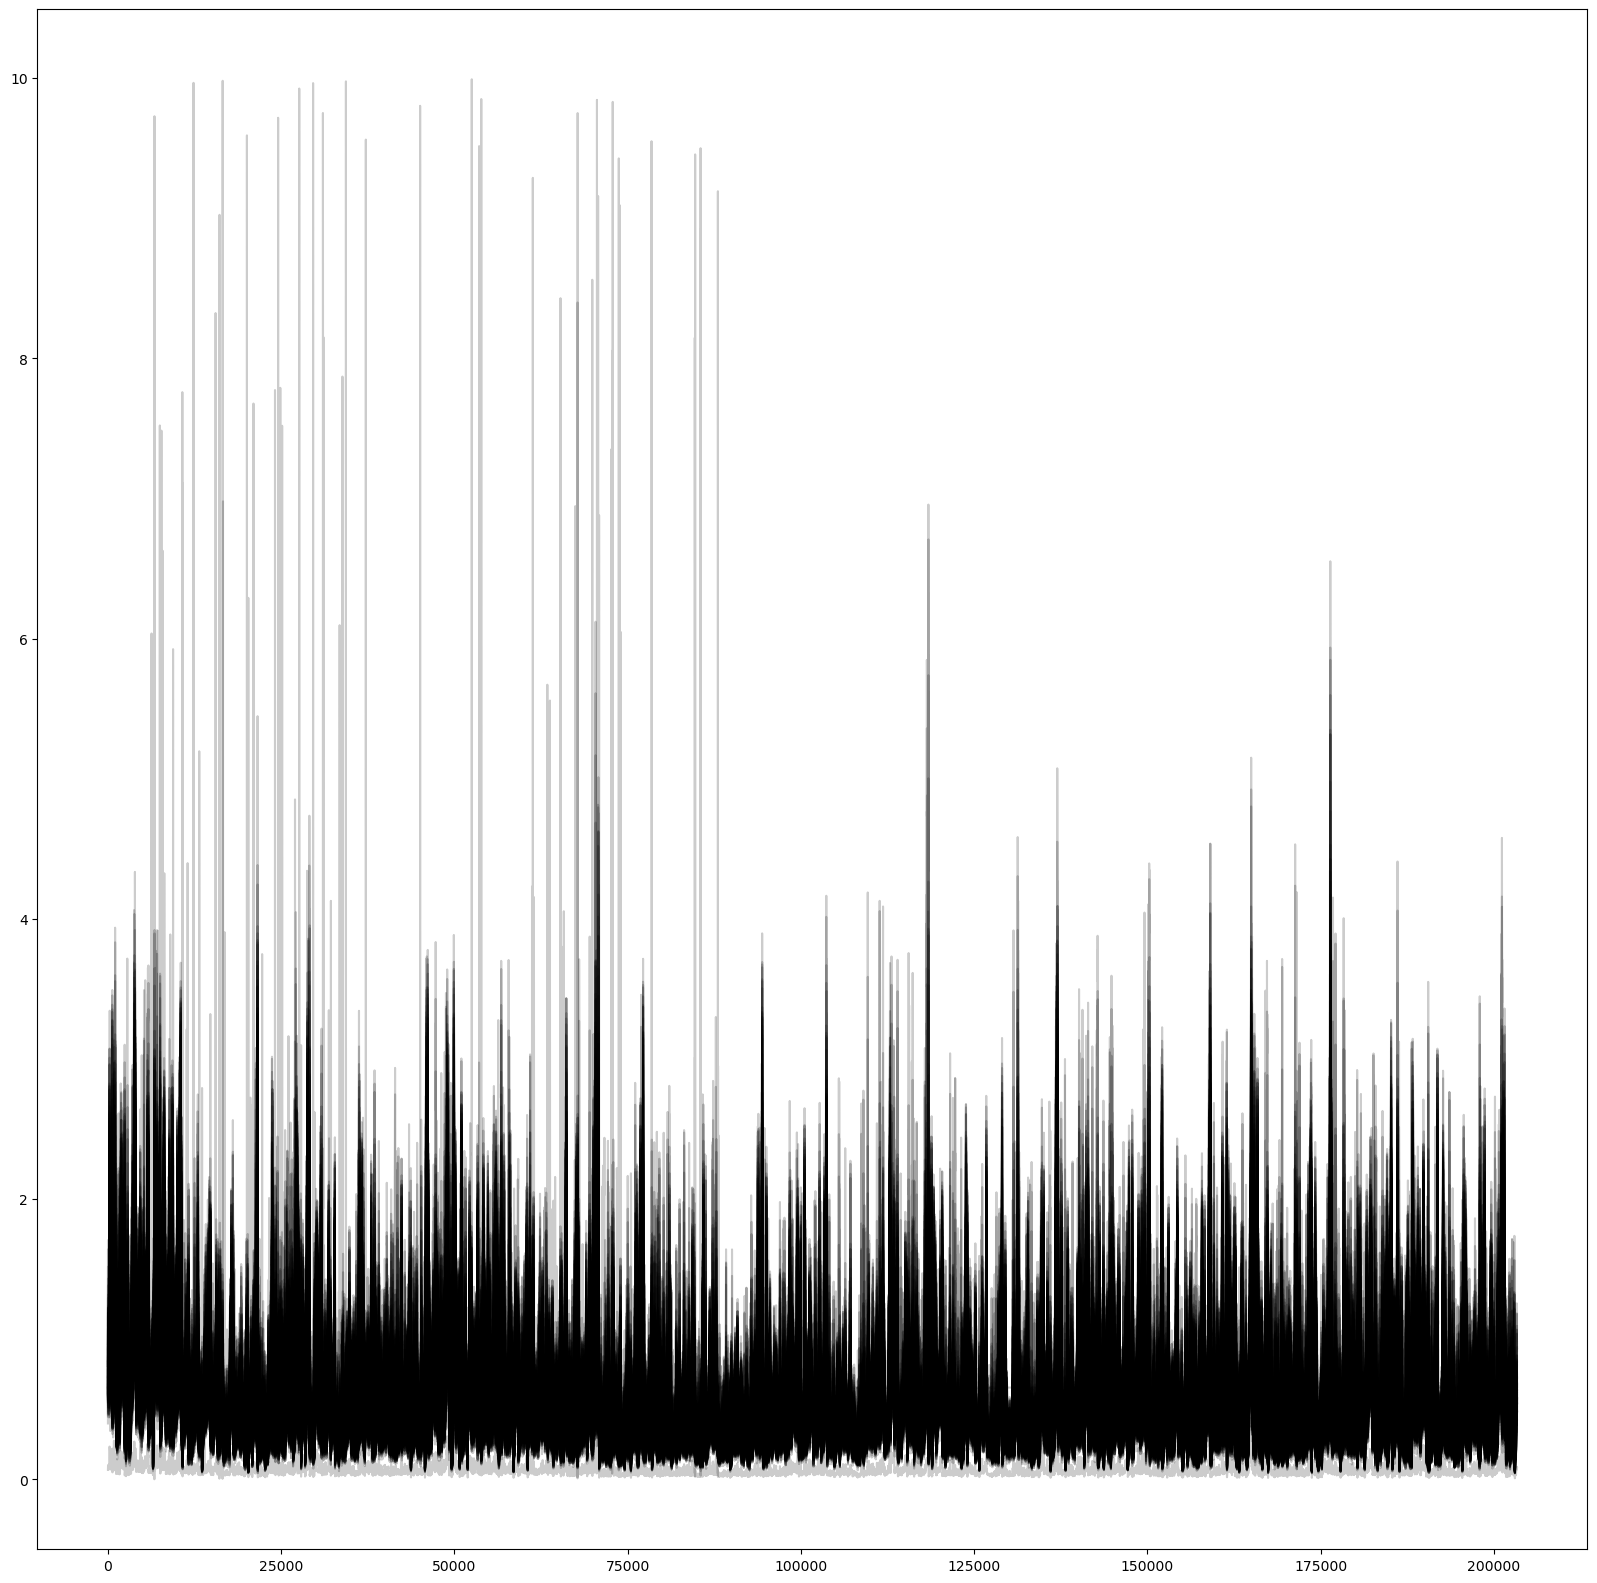

In [8]:
stacks = np.load(f"filtered_stacks/filtered_stack_{45}.npy")
signal = analysis.remove_nan_rows(stacks.transpose(0,1,3,2).reshape(-1,64))
signal[:,56] = np.mean([signal[:,56-8],signal[:,56-16]])
print(signal.shape)
mask = np.any(np.logical_or(signal<=0, signal>10),axis=1)
signal = signal[~mask]
print(signal.shape)
plt.figure(figsize=(20,20))
for ch in range(64):
    plt.plot(signal[:,ch],"k",alpha=0.2)
    # plt.plot(np.where(mask),signal[np.where(mask),ch],'ro')

In [11]:
'''
weight_concentration_prior
    The higher concentration puts more mass in the center and 
    will lead to more components being active, while a lower 
    concentration parameter will lead to more mass at the edge 
    of the mixture weights simplex.
'''
# https://stats.stackexchange.com/questions/210103/choosing-prior-parameters-for-variational-mixture-of-gaussians
# https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture 


from pathlib import Path

OVERWRITE = False

NUM_COMPONENTS = 12
folderpath = Path("gmm_models_log_trial")
if not folderpath.exists():
    Path.mkdir(folderpath)
file_prefix = "subject_"

for subject_idx in range(len(subjects)):

    filepath = Path(folderpath / (file_prefix + f"{subject_idx}.pkl"))
    if OVERWRITE == False:
        if filepath.exists():
            print(f"File {filepath} exists.")
        else:

            print(f"Fitting subject {subject_idx}.")
            block_stacks = np.load(f"filtered_stacks/filtered_stack_{subject_idx}.npy")
            model = BayesianGaussianMixture(n_components=NUM_COMPONENTS,
                                            weight_concentration_prior_type='dirichlet_process',
                                            weight_concentration_prior=1.0E-8,
                                            max_iter=200,
                                            n_init=2,
                                            warm_start=True,
                                            random_state=0,
                                            )
            models = []
            # 9 groups of 5 blocks each
            for block_idx in range(0,45,9):
                print(f"\tFitting blocks {block_idx} to {block_idx+9}")
                signal = analysis.remove_nan_rows(block_stacks[block_idx:block_idx+9].transpose(0,1,3,2).reshape(-1,64))
                if subject_idx == 34:
                    signal[:,56] = np.mean([signal[:,56-8],signal[:,56-16]],axis=0)
                    mask = np.any(np.logical_or(signal<=0, signal>15),axis=1)
                    signal = signal[~mask]
                if subject_idx == 40:
                    signal[:,56] = np.mean([signal[:,56-8],signal[:,56-16]],axis=0)
                    mask = np.any(np.logical_or(signal<=0, signal>10),axis=1)
                    signal = signal[~mask]
                if subject_idx == 45:
                    signal[:,56] = np.mean([signal[:,56-8],signal[:,56-16]],axis=0)
                    mask = np.any(np.logical_or(signal<=0, signal>10),axis=1)
                    signal = signal[~mask]                    
                log_signal = log_emg_data(signal)
                model.fit(log_signal)
                models.append(model)
                model = clone(model)

            print(f"Saving {filepath}.")
            with open(filepath,"wb") as handle:
                pickle.dump(models, handle)


File gmm_models_log_trial/subject_0.pkl exists.
File gmm_models_log_trial/subject_1.pkl exists.
File gmm_models_log_trial/subject_2.pkl exists.
File gmm_models_log_trial/subject_3.pkl exists.
File gmm_models_log_trial/subject_4.pkl exists.
File gmm_models_log_trial/subject_5.pkl exists.
File gmm_models_log_trial/subject_6.pkl exists.
File gmm_models_log_trial/subject_7.pkl exists.
File gmm_models_log_trial/subject_8.pkl exists.
File gmm_models_log_trial/subject_9.pkl exists.
File gmm_models_log_trial/subject_10.pkl exists.
File gmm_models_log_trial/subject_11.pkl exists.
File gmm_models_log_trial/subject_12.pkl exists.
File gmm_models_log_trial/subject_13.pkl exists.
File gmm_models_log_trial/subject_14.pkl exists.
File gmm_models_log_trial/subject_15.pkl exists.
File gmm_models_log_trial/subject_16.pkl exists.
File gmm_models_log_trial/subject_17.pkl exists.
File gmm_models_log_trial/subject_18.pkl exists.
File gmm_models_log_trial/subject_19.pkl exists.
File gmm_models_log_trial/subj

/home/spencer/miniconda3/envs/data/lib/python3.12/site-packages/sklearn/mixture/_base.py:268: ConvergenceWarning: Initialization 2 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


	Fitting blocks 27 to 36
	Fitting blocks 36 to 45
Saving gmm_models_log_trial/subject_45.pkl.
